In [1724]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings("ignore", category=UserWarning)

# **OBJETIVO DE NEGOCIO Y INDICAR DE RENDIMIENTO (KPI)**

El principal objetivo de negocio consiste  mejorar la eficiencia en el manejo de pacientes con cáncer de mama, optimizando la asignación de tratamientos específicos según el pronóstico de alto riesgo o bajo riesgo atendiendo a las posibles recaídas.

*INDICADOR DE RENDIMIENTO*

- **Reducción de Costos:** Comparar y minimizar los costos totales asociados al tratamiento de pacientes con cáncer de mama mediante el uso eficiente de tratamientos convencionales, tratamiento novedoso y seguimiento especial.



### **OBJETIVO DE CIENCIA DE DATOS**

El principal objetivo de Data Science consiste en determinar relaciones y análisis descriptivo de los datos, para identificar pacientes con alto riesgo y recaídas, intentando conseguir reducir los costos en la aplicación de tratamientos y su uso eficiente (KPI).

### LECTURA DATOS

In [1725]:
#mysql_config = {
#    'host': 'localhost',
#    'user': 'root',
#    'database': 'cancer_mama'
#}

#conn_mysql = mysql.connector.connect(**mysql_config)
#cursor_mysql = conn_mysql.cursor()

#query = "SELECT * FROM tumor;"
#df_sql = pd.read_sql_query(query, conn_mysql)

In [1726]:
# PARA MAC
# df_sql = pd.read_csv('./Datos/datos_sql.csv')
# df_sql = df_sql.drop('Unnamed: 0',axis=1)
# df_sql

In [1727]:
df_csv1 = pd.read_csv('./Datos/patients_batch1.csv')
df_csv2 = pd.read_csv('./Datos/patients_batch2.csv')
df_excel = pd.read_excel('./Datos/gynecological.xlsx')
df_excel = df_excel.drop('Unnamed: 0', axis=1)
df_json = pd.read_json('./Datos/histochemistry.json')
df_sql = pd.read_csv('./Datos/datos_sql.csv')
df_sql = df_sql.drop('Unnamed: 0', axis=1)

# **PREPROCESADO**

## **Preprocesado gynecological**


In [1728]:
df_excel

,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age
0,10011773,-8.0,0.0,NaN,0.0,NaN,71.0
1,10030299,3.0,NaN,0.0,0.0,NaN,NaN
2,10030824,0.0,0.0,0.0,NaN,NaN,44.0
3,10053435,2.0,NaN,0.0,1.0,21.0,74.0
4,10111454,0.0,-6.0,NaN,0.0,16.0,55.0
...,...,...,...,...,...,...,...
7681,99948591,9.0,2.0,-4.0,0.0,12.0,47.0
7682,99961100,2.0,2.0,0.0,0.0,19.0,52.0
7683,99981192,3.0,3.0,0.0,-5.0,11.0,NaN
7684,99992350,4.0,3.0,NaN,-6.0,11.0,55.0


In [1729]:
df = df_excel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7686 entries, 0 to 7685
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ehr            7686 non-null   int64  
 1   pregnancy      6413 non-null   float64
 2   birth          6417 non-null   float64
 3   caesarean      6131 non-null   float64
 4   abort          6235 non-null   float64
 5   menarche_age   4901 non-null   float64
 6   menopause_age  4486 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 420.5 KB


In [1730]:
df.describe()

,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age
count,7.686000e+03,6413.000000,6417.000000,6131.000000,6235.000000,4901.000000,4486.000000
mean,5.505640e+07,2.078590,1.673991,0.029848,0.259984,12.736584,50.263041
std,2.621591e+07,3.052473,3.006228,2.677790,2.691482,3.062710,17.196300
min,1.001177e+07,-10.000000,-10.000000,-11.000000,-12.000000,0.000000,2.000000
25%,3.202165e+07,1.000000,0.000000,0.000000,0.000000,11.000000,44.000000
50%,5.503108e+07,2.000000,2.000000,0.000000,0.000000,13.000000,49.000000
75%,7.794185e+07,3.000000,3.000000,0.000000,1.000000,14.000000,53.000000
max,9.999442e+07,14.000000,15.000000,12.000000,12.000000,26.000000,145.000000


Denotamos , que hay valores atípicos y que no concuerdan en las columnas, como por ejemplo el caso de pregancy, birth... que denotan valores mínimos de -20 y de -18, respectivamente. Por ello, vamos a realizar una Exploración inicial

In [1731]:
df.isnull().sum()

ehr                 0
pregnancy        1273
birth            1269
caesarean        1555
abort            1451
menarche_age     2785
menopause_age    3200
dtype: int64

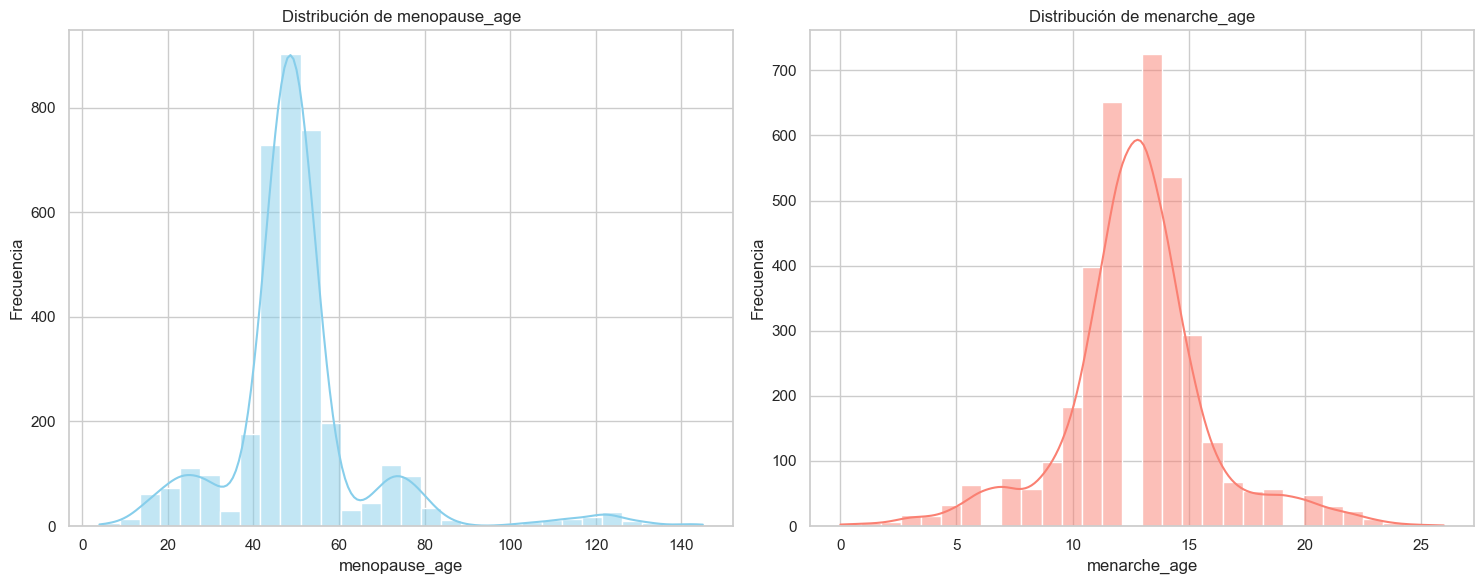

In [1732]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tu DataFrame se llama df
# Filtra los valores nulos antes de visualizar
df_filtrado = df[['menopause_age', 'menarche_age']].dropna()

# Configura el estilo de Seaborn para gráficos más atractivos
sns.set(style="whitegrid")

# Crea una figura con dos subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Subgráfico 1: menopause_age
sns.histplot(df_filtrado['menopause_age'], kde=True, bins=30, color='skyblue', ax=axes[0])
axes[0].set_title('Distribución de menopause_age')
axes[0].set_xlabel('menopause_age')
axes[0].set_ylabel('Frecuencia')

# Subgráfico 2: menarche_age
sns.histplot(df_filtrado['menarche_age'], kde=True, bins=30, color='salmon', ax=axes[1])
axes[1].set_title('Distribución de menarche_age')
axes[1].set_xlabel('menarche_age')
axes[1].set_ylabel('Frecuencia')

# Ajusta el diseño de la figura
plt.tight_layout()
plt.show()


**Imputación con la Media:**

- Ventajas:
    - Apropiada para variables con distribución simétrica.
    - Puede ser más sensible a cambios en los valores extremos (outliers).
- Desventajas:
    - Sensible a los outliers: si tienes valores extremos, la media puede sesgarse.
    - No es robusta: puede no ser representativa si la distribución no es simétrica.

**Imputación con la Mediana:**

- Ventajas:
    - Robusta a valores extremos: la mediana es menos sensible a los outliers.
    - Apropiada para variables con distribuciones sesgadas.
- Desventajas:
    - Menos eficiente cuando la distribución es aproximadamente simétrica.

**¿Cuándo elegir la Media o la Mediana?**

- Distribución Simétrica:
    - Si la variable sigue una distribución normal o aproximadamente normal, la media puede ser una elección razonable.

Debido a que no tenemos más información sobre menarche_age, edad de la primera menstruación , tomando referencias algunos estudios , se dice que la edad media es en torno a los 12 años, en eras de ellos, vamos a considerar valores entre 10 y 20 años , el resto los imputamos a nulos y posteriormente imputaremos los nulos con la media de los valores que tengamos, decidimos la media porque la distrubucción parece *SIMÉTRICA*. Es por ello, que consideramos valores menores a 10 y mayores a 20 como datos atípicos o que principalmente hayan sido tomados de manera errónea.

In [1733]:
# Utiliza value_counts() para contar cuántas veces aparece cada valor en "menarche_age"
conteo_menarche_age = df['menarche_age'].value_counts()
conteo_menarche_age

13.0    1005
12.0     872
14.0     731
11.0     571
15.0     403
10.0     254
16.0     182
9.0      131
17.0      93
7.0       91
6.0       81
8.0       81
18.0      80
19.0      71
20.0      58
5.0       45
21.0      40
22.0      28
4.0       26
3.0       17
23.0      14
2.0        8
1.0        6
24.0       5
0.0        4
25.0       3
26.0       1
Name: menarche_age, dtype: int64

In [1734]:
# Establecer como NaN los valores menores que 10 o mayores que 20
df.loc[(df['menarche_age'] < 10) | (df['menarche_age'] > 20), 'menarche_age'] = pd.NA

# Imputar los valores nulos con la mediana
mediana_menarche_age = df['menarche_age'].mean()
mediana_menarche_age_int = round(mediana_menarche_age)  # Redondear a entero
df['menarche_age'].fillna(mediana_menarche_age_int, inplace=True)

df

,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age
0,10011773,-8.0,0.0,NaN,0.0,13.0,71.0
1,10030299,3.0,NaN,0.0,0.0,13.0,NaN
2,10030824,0.0,0.0,0.0,NaN,13.0,44.0
3,10053435,2.0,NaN,0.0,1.0,13.0,74.0
4,10111454,0.0,-6.0,NaN,0.0,16.0,55.0
...,...,...,...,...,...,...,...
7681,99948591,9.0,2.0,-4.0,0.0,12.0,47.0
7682,99961100,2.0,2.0,0.0,0.0,19.0,52.0
7683,99981192,3.0,3.0,0.0,-5.0,11.0,NaN
7684,99992350,4.0,3.0,NaN,-6.0,11.0,55.0


En el caso de la menopausia, llevamos a cabo una situación similar, estudios confirman que la edad media a la que esto ocurre son los 50 años, variando entre los 45 y 55 años según factores ambientales y genéticos, y se considera menopausia precoz cuando ocurre antes de los 45 años siendo en ese caso tributaria de tratamiento hormonal.

Por ello, nosotros vamos a considerar esencialmente un rango desde los 37 hasta los 62, dentro de este rango se tomarán esos valores, imputando el resto a nulos y posteriormente con la mediana de la columna asociada, es decir, siguiendo un enfoque similar al anterior

In [1735]:
# Utiliza value_counts() para contar cuántas veces aparece cada valor en "menarche_age"
conteo_menopause_age = df['menopause_age'].value_counts()
conteo_menopause_age

48.0     310
49.0     294
47.0     283
46.0     255
52.0     253
        ... 
85.0       1
110.0      1
5.0        1
4.0        1
2.0        1
Name: menopause_age, Length: 126, dtype: int64

In [1736]:
# Establecer como NaN los valores menores que 10 o mayores que 20
df.loc[(df['menopause_age'] < 37) | (df['menopause_age'] > 62), 'menopause_age'] = pd.NA

# Imputar los valores nulos con la mediana
mediana_menarche_age = df['menopause_age'].median()
df['menopause_age'].fillna(mediana_menarche_age, inplace=True)
df
#Es lógico, puesto que la mediana sale aproximadamente 49 lo que nos puede servir.

,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age
0,10011773,-8.0,0.0,NaN,0.0,13.0,49.0
1,10030299,3.0,NaN,0.0,0.0,13.0,49.0
2,10030824,0.0,0.0,0.0,NaN,13.0,44.0
3,10053435,2.0,NaN,0.0,1.0,13.0,49.0
4,10111454,0.0,-6.0,NaN,0.0,16.0,55.0
...,...,...,...,...,...,...,...
7681,99948591,9.0,2.0,-4.0,0.0,12.0,47.0
7682,99961100,2.0,2.0,0.0,0.0,19.0,52.0
7683,99981192,3.0,3.0,0.0,-5.0,11.0,49.0
7684,99992350,4.0,3.0,NaN,-6.0,11.0,55.0


In [1737]:
df.isnull().sum()

ehr                 0
pregnancy        1273
birth            1269
caesarean        1555
abort            1451
menarche_age        0
menopause_age       0
dtype: int64

In [1738]:
df['ehr'].duplicated().any()

False

Vemos que no tenemos ningún duplicado en cuanto al EHR lo que nos delimita que todos los pacientes son únicos

**Se toma una decisión importante, y como expertos en el dominio de los datos, hemos considerado que la variable pregancy sea la de mayor importancia, en el sentido de que tiene datos tomados REALES, por ello se decide poner los valores negativos de la misma a 0**

In [1739]:
df.describe()

,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age
count,7.686000e+03,6413.000000,6417.000000,6131.000000,6235.000000,7686.000000,7686.000000
mean,5.505640e+07,2.078590,1.673991,0.029848,0.259984,13.118527,48.858054
std,2.621591e+07,3.052473,3.006228,2.677790,2.691482,1.538955,3.152678
min,1.001177e+07,-10.000000,-10.000000,-11.000000,-12.000000,10.000000,37.000000
25%,3.202165e+07,1.000000,0.000000,0.000000,0.000000,13.000000,49.000000
50%,5.503108e+07,2.000000,2.000000,0.000000,0.000000,13.000000,49.000000
75%,7.794185e+07,3.000000,3.000000,0.000000,1.000000,13.000000,49.000000
max,9.999442e+07,14.000000,15.000000,12.000000,12.000000,20.000000,62.000000


In [1740]:
columnas_a_cero = ['pregnancy']

# Aplica una función que establece los valores negativos en 0
df[columnas_a_cero] = df[columnas_a_cero].applymap(lambda x: max(0, x))

# Imprime el DataFrame resultante
df

,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age
0,10011773,0.0,0.0,NaN,0.0,13.0,49.0
1,10030299,3.0,NaN,0.0,0.0,13.0,49.0
2,10030824,0.0,0.0,0.0,NaN,13.0,44.0
3,10053435,2.0,NaN,0.0,1.0,13.0,49.0
4,10111454,0.0,-6.0,NaN,0.0,16.0,55.0
...,...,...,...,...,...,...,...
7681,99948591,9.0,2.0,-4.0,0.0,12.0,47.0
7682,99961100,2.0,2.0,0.0,0.0,19.0,52.0
7683,99981192,3.0,3.0,0.0,-5.0,11.0,49.0
7684,99992350,4.0,3.0,NaN,-6.0,11.0,55.0


Realizamos ahora que cuando dicha columna es 0, es decir la de pregnancy, el resto de valores de las otras 3 columnas de la cuales dependen , para que sean consistentes, deben de ser 0.

In [1741]:
columnas_a_cero = ['abort', 'caesarean', 'birth']

# Establece a 0 las columnas cuando 'pregnancy' es 0
df.loc[df['pregnancy'] == 0, columnas_a_cero] = 0

# Imprime el DataFrame resultante
df


,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age
0,10011773,0.0,0.0,0.0,0.0,13.0,49.0
1,10030299,3.0,NaN,0.0,0.0,13.0,49.0
2,10030824,0.0,0.0,0.0,0.0,13.0,44.0
3,10053435,2.0,NaN,0.0,1.0,13.0,49.0
4,10111454,0.0,0.0,0.0,0.0,16.0,55.0
...,...,...,...,...,...,...,...
7681,99948591,9.0,2.0,-4.0,0.0,12.0,47.0
7682,99961100,2.0,2.0,0.0,0.0,19.0,52.0
7683,99981192,3.0,3.0,0.0,-5.0,11.0,49.0
7684,99992350,4.0,3.0,NaN,-6.0,11.0,55.0


In [1742]:
df.isnull().sum()

ehr                0
pregnancy          0
birth            986
caesarean        983
abort            931
menarche_age       0
menopause_age      0
dtype: int64

Una vez realizada la acción anterior, nos damos cuenta que aquellos valores negativos del resto de columnas , también son incosistentes entonces para aquellos que NO SON NULOS y que son negativos, los establecemos a 0 para que entren en un rango adecuado.

In [1743]:
# Reemplazar los valores negativos y no nulos con 0
df['birth'] = df['birth'].apply(lambda x: 0 if pd.notna(x) and x < 0 else x)
df['caesarean'] = df['caesarean'].apply(lambda x: 0 if pd.notna(x) and x < 0 else x)
df['abort'] = df['abort'].apply(lambda x: 0 if pd.notna(x) and x < 0 else x)
df

,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age
0,10011773,0.0,0.0,0.0,0.0,13.0,49.0
1,10030299,3.0,NaN,0.0,0.0,13.0,49.0
2,10030824,0.0,0.0,0.0,0.0,13.0,44.0
3,10053435,2.0,NaN,0.0,1.0,13.0,49.0
4,10111454,0.0,0.0,0.0,0.0,16.0,55.0
...,...,...,...,...,...,...,...
7681,99948591,9.0,2.0,0.0,0.0,12.0,47.0
7682,99961100,2.0,2.0,0.0,0.0,19.0,52.0
7683,99981192,3.0,3.0,0.0,0.0,11.0,49.0
7684,99992350,4.0,3.0,NaN,0.0,11.0,55.0


In [1744]:
df.isnull().sum()

ehr                0
pregnancy          0
birth            986
caesarean        983
abort            931
menarche_age       0
menopause_age      0
dtype: int64

Basándonos en la proporción, calculamos algunos valores nulos que podemos denotar de cada una de las columnas, realizando que  la columna de pregnancy es igual a la suma de las otras 3 columnas (abort, birth, caesarean).

In [1745]:
# Imputar nulos en las columnas birth, caesarean y abort
df['birth'] = df['birth'].fillna(df['pregnancy'] - df['caesarean'] - df['abort'])
df['caesarean'] = df['caesarean'].fillna(df['pregnancy'] - df['birth'] - df['abort'])
df['abort'] = df['abort'].fillna(df['pregnancy'] - df['birth'] - df['caesarean'])

Vamos a crear una columna adicional para ver si hay incosistencias... ya que a simple vista surge dudas sobre si las hay , ya que si que parece 

In [1746]:
df['inconsistency'] = 0  # Inicializar la columna con 0
df.loc[df['pregnancy'] != (df['birth'] + df['caesarean'] + df['abort']), 'inconsistency'] = 1
df

,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age,inconsistency
0,10011773,0.0,0.0,0.0,0.0,13.0,49.0,0
1,10030299,3.0,3.0,0.0,0.0,13.0,49.0,0
2,10030824,0.0,0.0,0.0,0.0,13.0,44.0,0
3,10053435,2.0,1.0,0.0,1.0,13.0,49.0,0
4,10111454,0.0,0.0,0.0,0.0,16.0,55.0,0
...,...,...,...,...,...,...,...,...
7681,99948591,9.0,2.0,0.0,0.0,12.0,47.0,1
7682,99961100,2.0,2.0,0.0,0.0,19.0,52.0,0
7683,99981192,3.0,3.0,0.0,0.0,11.0,49.0,0
7684,99992350,4.0,3.0,1.0,0.0,11.0,55.0,0


In [1747]:
df[df['inconsistency']==1]

,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age,inconsistency
8,10131227,7.0,7.0,NaN,NaN,12.0,49.0,1
13,10165941,4.0,4.0,0.0,7.0,13.0,49.0,1
16,10172680,3.0,0.0,7.0,0.0,15.0,52.0,1
23,10227387,2.0,1.0,3.0,1.0,13.0,49.0,1
26,10255411,4.0,4.0,6.0,0.0,10.0,47.0,1
...,...,...,...,...,...,...,...,...
7672,99812629,1.0,NaN,NaN,0.0,13.0,49.0,1
7673,99815491,3.0,0.0,0.0,2.0,13.0,49.0,1
7680,99948515,7.0,2.0,0.0,0.0,11.0,49.0,1
7681,99948591,9.0,2.0,0.0,0.0,12.0,47.0,1


Obtenemos que 1639 filas , contienen incosistencias, no cumplen con las expectativas, vamos a ver si alguna de ellas se puede imputar o solucionar, el resto, como tenemos datos suficientes, las podemos eliminar sin seguir ningún tipo de criterio.

Calculamos una función que para aquellos en los que haya 2 nulos, repartimos equitativamente la carga para ambas, en caso de que la fracción no sea entera, entonces no se almacena puesto que no es razonable tener 1.5 partos o 0.5 partos....

In [1748]:
# Función para distribuir nulos proporcionalmente
def distribuir_nulos(fila):
    nulos = fila.isnull().sum()  # Contar el número de nulos en la fila
    if nulos > 0:
        proporciones = fila['pregnancy'] / nulos  # Calcular la distribución proporcional
        for col in ['birth', 'caesarean', 'abort']:
            if pd.isnull(fila[col]):
                valor_proporcion = proporciones
                if valor_proporcion.is_integer():  # Verificar si es un número entero
                    fila[col] = int(valor_proporcion)
    return fila

# Aplicar la función a cada fila del DataFrame
df = df.apply(distribuir_nulos, axis=1)


In [1749]:
df.isnull().sum()

ehr                0
pregnancy          0
birth            215
caesarean        210
abort            198
menarche_age       0
menopause_age      0
inconsistency      0
dtype: int64

In [1750]:
df['inconsistency'] = 0  # Inicializar la columna con 0
df.loc[df['pregnancy'] != (df['birth'] + df['caesarean'] + df['abort']), 'inconsistency'] = 1
df

,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age,inconsistency
0,10011773.0,0.0,0.0,0.0,0.0,13.0,49.0,0
1,10030299.0,3.0,3.0,0.0,0.0,13.0,49.0,0
2,10030824.0,0.0,0.0,0.0,0.0,13.0,44.0,0
3,10053435.0,2.0,1.0,0.0,1.0,13.0,49.0,0
4,10111454.0,0.0,0.0,0.0,0.0,16.0,55.0,0
...,...,...,...,...,...,...,...,...
7681,99948591.0,9.0,2.0,0.0,0.0,12.0,47.0,1
7682,99961100.0,2.0,2.0,0.0,0.0,19.0,52.0,0
7683,99981192.0,3.0,3.0,0.0,0.0,11.0,49.0,0
7684,99992350.0,4.0,3.0,1.0,0.0,11.0,55.0,0


In [1751]:
df[df['inconsistency']==1]

,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age,inconsistency
8,10131227.0,7.0,7.0,NaN,NaN,12.0,49.0,1
13,10165941.0,4.0,4.0,0.0,7.0,13.0,49.0,1
16,10172680.0,3.0,0.0,7.0,0.0,15.0,52.0,1
23,10227387.0,2.0,1.0,3.0,1.0,13.0,49.0,1
26,10255411.0,4.0,4.0,6.0,0.0,10.0,47.0,1
...,...,...,...,...,...,...,...,...
7669,99791778.0,1.0,0.0,0.0,7.0,15.0,53.0,1
7672,99812629.0,1.0,NaN,NaN,0.0,13.0,49.0,1
7673,99815491.0,3.0,0.0,0.0,2.0,13.0,49.0,1
7680,99948515.0,7.0,2.0,0.0,0.0,11.0,49.0,1


In [1752]:
# Eliminar filas donde inconsistency es igual a 1
df = df[df['inconsistency'] == 0]
df

,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age,inconsistency
0,10011773.0,0.0,0.0,0.0,0.0,13.0,49.0,0
1,10030299.0,3.0,3.0,0.0,0.0,13.0,49.0,0
2,10030824.0,0.0,0.0,0.0,0.0,13.0,44.0,0
3,10053435.0,2.0,1.0,0.0,1.0,13.0,49.0,0
4,10111454.0,0.0,0.0,0.0,0.0,16.0,55.0,0
...,...,...,...,...,...,...,...,...
7679,99915606.0,0.0,0.0,0.0,0.0,12.0,56.0,0
7682,99961100.0,2.0,2.0,0.0,0.0,19.0,52.0,0
7683,99981192.0,3.0,3.0,0.0,0.0,11.0,49.0,0
7684,99992350.0,4.0,3.0,1.0,0.0,11.0,55.0,0


## **Preprocesado patients_batch1/patients_batch2**

Los datos de los pacientes vienen dados en batch distintos recopilados en momentos diferentes. Entonces, primero ponemos en el mismo formato de manera individual los dos csv y después haremos un merge para unirlos en uno solo

In [1753]:
# Convertir las columnas objeto al formato datetime
df_csv1['birth_date'] = pd.to_datetime(df_csv1['birth_date'], format='%Y-%m-%d', errors='coerce')
df_csv1['diagnosis_date'] = pd.to_datetime(df_csv1['diagnosis_date'], format='%Y-%m-%d', errors='coerce')
df_csv1['death_date'] = pd.to_datetime(df_csv1['death_date'],format='%Y-%m-%d', errors='coerce')

# Cambiamos los formatos a '%d-%m-%Y'
df_csv1['birth_date'] = df_csv1['birth_date'].dt.strftime('%d-%m-%Y')
df_csv1['diagnosis_date'] = df_csv1['diagnosis_date'].dt.strftime('%d-%m-%Y')
df_csv1['death_date'] = df_csv1['death_date'].dt.strftime('%d-%m-%Y')


df_csv1

,ehr,birth_date,diagnosis_date,death_date
0,10011773,05-07-1959,02-04-2015,NaN
1,10020495,02-10-1953,04-12-2017,NaN
2,10030299,16-08-1966,27-06-2019,NaN
3,10030824,03-03-1953,07-09-2018,NaN
4,10041592,06-07-1959,19-11-2018,NaN
...,...,...,...,...
7495,77575810,21-03-1958,22-02-2014,NaN
7496,77578551,18-05-1948,11-07-2018,NaN
7497,77579212,13-02-1976,22-03-2022,NaN
7498,77605742,16-03-1950,29-06-2015,NaN


In [1754]:
df_csv1['birth_date'] = pd.to_datetime(df_csv1['birth_date'])
df_csv1['diagnosis_date'] = pd.to_datetime(df_csv1['diagnosis_date'])
df_csv1['death_date'] = pd.to_datetime(df_csv1['death_date'])

In [1755]:
df_csv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ehr             7500 non-null   int64         
 1   birth_date      7500 non-null   datetime64[ns]
 2   diagnosis_date  7500 non-null   datetime64[ns]
 3   death_date      868 non-null    datetime64[ns]
dtypes: datetime64[ns](3), int64(1)
memory usage: 234.5 KB


In [1756]:
# Convertir las columnas objeto al formato datetime
df_csv2['birth_date'] = pd.to_datetime(df_csv2['birth_date'], format='%d/%m/%Y', errors='coerce')
df_csv2['diagnosis_date'] = pd.to_datetime(df_csv2['diagnosis_date'], format='%d/%m/%Y', errors='coerce')
df_csv2['death_date'] = pd.to_datetime(df_csv2['death_date'], format='%d/%m/%Y', errors='coerce')

# Cambiamos los formatos a '%d-%m-%Y'
df_csv2['birth_date'] = df_csv2['birth_date'].dt.strftime('%d-%m-%Y')
df_csv2['diagnosis_date'] = df_csv2['diagnosis_date'].dt.strftime('%d-%m-%Y')
df_csv2['death_date'] = df_csv2['death_date'].dt.strftime('%d-%m-%Y')

df_csv2

,ehr,birth_date,diagnosis_date,death_date
0,72992494,13-02-1942,08-05-2018,NaN
1,73002338,22-10-1949,08-09-2018,NaN
2,73008149,04-12-1969,12-04-2018,NaN
3,73012939,18-09-1973,17-04-2014,01-01-2018
4,73019870,07-12-1955,24-05-2018,NaN
...,...,...,...,...
2995,99966287,16-12-1978,02-08-2018,NaN
2996,99981192,10-04-1949,28-10-2017,NaN
2997,99988958,21-01-1966,27-05-2013,NaN
2998,99992350,04-09-1939,17-12-2018,NaN


In [1757]:
df_csv2['birth_date'] = pd.to_datetime(df_csv2['birth_date'])
df_csv2['diagnosis_date'] = pd.to_datetime(df_csv2['diagnosis_date'])
df_csv2['death_date'] = pd.to_datetime(df_csv2['death_date'])

In [1758]:
df_csv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ehr             3000 non-null   int64         
 1   birth_date      3000 non-null   datetime64[ns]
 2   diagnosis_date  3000 non-null   datetime64[ns]
 3   death_date      316 non-null    datetime64[ns]
dtypes: datetime64[ns](3), int64(1)
memory usage: 93.9 KB


Ya tenemos los dos df con el mismo formato individualmente, ahora realizamos un merge para juntar los dos

In [1759]:
df_csv = pd.merge(df_csv1, df_csv2, on=['ehr','birth_date','diagnosis_date','death_date'], how='outer')
df_csv

,ehr,birth_date,diagnosis_date,death_date
0,10011773,1959-05-07,2015-02-04,NaT
1,10020495,1953-02-10,2017-04-12,NaT
2,10030299,1966-08-16,2019-06-27,NaT
3,10030824,1953-03-03,2018-07-09,NaT
4,10041592,1959-06-07,2018-11-19,NaT
...,...,...,...,...
9995,99966287,1978-12-16,2018-02-08,NaT
9996,99981192,1949-10-04,2017-10-28,NaT
9997,99988958,1966-01-21,2013-05-27,NaT
9998,99992350,1939-04-09,2018-12-17,NaT


Podemos observar que nuestro nuevo dataframe tiene solo 10000, cuando nuestros dos batch suman 10500 (7500 y 3000 respectivamente). Podemos deducir que había filas con pacientes duplicados, y como hemos realizado el merge con 'outer' estos valores no han sido duplicados, ya que poseían los mismos datos, sino que solo se ha añadido uno.

Para probar que nuestra teoría es cierta, verificamos que no hay nulos en nuestro nuevo dataframe.

In [1760]:
df_csv['ehr'].duplicated().any()

False

Nos devuelve 'False', por lo tanto, verificamos nuestra teoría.

Ahora vamos a realizar un pequeño análisis de cada una de las variables.

In [1761]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ehr             10000 non-null  int64         
 1   birth_date      10000 non-null  datetime64[ns]
 2   diagnosis_date  10000 non-null  datetime64[ns]
 3   death_date      1135 non-null   datetime64[ns]
dtypes: datetime64[ns](3), int64(1)
memory usage: 390.6 KB


Observamos que en nuestro dataset de csv tenemos variables de tipo int64 y datetime; El identificador del paciente tendrá valor numérico, y luego el resto de variables (birth_date, diagnosis_date, death_date) con formato de datetime.

Tambien podemos observar gracias a la columna Non-Null Count, que de las variables birth_date y diagnosis_date no tenemos ningun valor nulo (ya que tenemos 10000 valores no nulos). 

Sin embargo, en la columna death_date si que tenemos nulos. Vamos a realizar un recuento de valores para esa columna para ver cuantos pacientes han fallecido de nuestro conjunto de datos

In [1762]:
valores = df_csv['death_date'].count()
valores

1135

In [1763]:
valores = df_csv['death_date'].isnull().sum()
valores

8865

Vemos que  hay 1135 pacientes que han fallecido, y 8865 pacientes se encuentran estables.

Una vez que tenemos todos los pacientes correctamente, vamos a comprobar que las fechas de los pacientes entran en los rangos correctos:
- Dia: [1:31]
- Mes: [1:12]

Empezamos comprobando que el rango de los días es el correcto:

In [1764]:
columnas = ['birth_date', 'diagnosis_date', 'death_date']

for i in columnas:
    # Especifico el rango
    rango_días = (
        pd.to_datetime(df_csv[i], format='%Y-%m-%d', errors='coerce').dt.day < 1
        | (pd.to_datetime(df_csv[i], format='%Y-%m-%d', errors='coerce').dt.day > 31)
    )

    filas_fuera_de_rango = df_csv[rango_días]

    if not filas_fuera_de_rango.empty:
        print(f"Filas con días fuera del rango en {i}:")
        print(filas_fuera_de_rango)
    else:
        print(f"Todos los días en {i} están dentro del rango.")

Todos los días en birth_date están dentro del rango.
Todos los días en diagnosis_date están dentro del rango.
Todos los días en death_date están dentro del rango.


Comprobamos ahora el rango de los meses:

In [1765]:
columnas = ['birth_date', 'diagnosis_date', 'death_date']

for i in columnas:
    # Especifico el rango
    rango_mes = (
        pd.to_datetime(df_csv[i], format='%Y-%m-%d', errors='coerce').dt.month < 1
        | (pd.to_datetime(df_csv[i], format='%Y-%m-%d', errors='coerce').dt.month > 12)
    )

    filas_fuera_de_rango = df_csv[rango_mes]

    if not filas_fuera_de_rango.empty:
        print(f"Filas con días fuera del rango en {i}:")
        print(filas_fuera_de_rango)
    else:
        print(f"Todos los días en {i} están dentro del rango.")

Todos los días en birth_date están dentro del rango.
Todos los días en diagnosis_date están dentro del rango.
Todos los días en death_date están dentro del rango.


Por lo tanto, podemos concluir que tenemos todos los datos en el mismo formato, y con los valores correctos. Es decir, no tenemos ninguna fecha mal puesta

Para el posterior análisis de los datos, vamos a calcular la edad de cada paciente. Para ello deberemos dividir el conjunto de datos en dos; pacientes que han fallecido y pacientes que no han fallecido. 
De tal manera, que si han fallecido la edad de calculará respecto a esa fecha y si no han fallecido respecto al año actual 

In [1767]:
año_actual = datetime.now().year

def calcular_edad(fecha_nacimiento, fecha_fallecimiento):
    if not pd.isnull(fecha_fallecimiento).any():
        # Paciente fallecido: calcular edad hasta la fecha de fallecimiento
        return (fecha_fallecimiento - fecha_nacimiento).astype('datetime64[Y]').astype(int)
    else:
        # Paciente vivo: calcular edad hasta el año actual
        return año_actual - fecha_nacimiento.dt.year

In [1768]:
df_csv['Age'] = calcular_edad(df_csv['birth_date'], df_csv['death_date'])
df_csv

,ehr,birth_date,diagnosis_date,death_date,Age
0,10011773,1959-05-07,2015-02-04,NaT,65
1,10020495,1953-02-10,2017-04-12,NaT,71
2,10030299,1966-08-16,2019-06-27,NaT,58
3,10030824,1953-03-03,2018-07-09,NaT,71
4,10041592,1959-06-07,2018-11-19,NaT,65
...,...,...,...,...,...
9995,99966287,1978-12-16,2018-02-08,NaT,46
9996,99981192,1949-10-04,2017-10-28,NaT,75
9997,99988958,1966-01-21,2013-05-27,NaT,58
9998,99992350,1939-04-09,2018-12-17,NaT,85


## **Preprocesado histochemistry**

Lo pasamos a formato csv para poder estudiar los datos más fácilmente, y lo guardamos como 'datos_json.csv'

In [1769]:
df_json.to_csv('./Datos/datos_json.csv',)
df_json

,ehr,er,her2,ki67,pr
0,10011773,0.0,0.0,19.0,NaN
1,10020495,1.0,0.0,9.0,0.0
2,10030299,1.0,NaN,18.0,1.0
3,10030824,1.0,0.0,NaN,1.0
4,10041592,0.0,0.0,65.0,0.0
...,...,...,...,...,...
9995,99966287,1.0,0.0,NaN,0.0
9996,99981192,1.0,0.0,14.0,0.0
9997,99988958,NaN,0.0,67.0,NaN
9998,99992350,0.0,0.0,16.0,0.0


Al igual que hemos realizado con el preprocesado de los datos de los pacientes, comprobamos si tenemos identificadores duplicados

In [1770]:
df_json['ehr'].duplicated().any()

False

In [1771]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ehr     10000 non-null  int64  
 1   er      9042 non-null   float64
 2   her2    9006 non-null   float64
 3   ki67    9032 non-null   float64
 4   pr      9018 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 390.8 KB


Observamos que tenemos todos los datos de tipo numérico. El identificador del paciente (ehr) de tipo int, y el resto de variables como float

Mostramos ahora cuantos nulos hay por columna

In [1772]:
nulos = df_json.isnull()

num_nulos_por_columna = nulos.sum()

print("Número de valores nulos por columna:")
print(num_nulos_por_columna)

Número de valores nulos por columna:
ehr       0
er      958
her2    994
ki67    968
pr      982
dtype: int64


Tenemos bastantes valores nulos por columna. Vamos a realizar un pequeño análisis de los nulos que tenemos

In [1773]:
# Porcentaje de valores nulos por columna
porcentaje = (df_json.isnull().mean() * 100).round(2)
porcentaje

ehr     0.00
er      9.58
her2    9.94
ki67    9.68
pr      9.82
dtype: float64

Obtenemos unos porcentajes bastante bajos, ninguno llega al 10% de los datos que tenemos. Por lo tanto podemos decir, que la cantidad de datos nulos que tenemos es bastante pequeña

Calculamos la matriz de correlación para ver si existe alguna correlación entre las variables

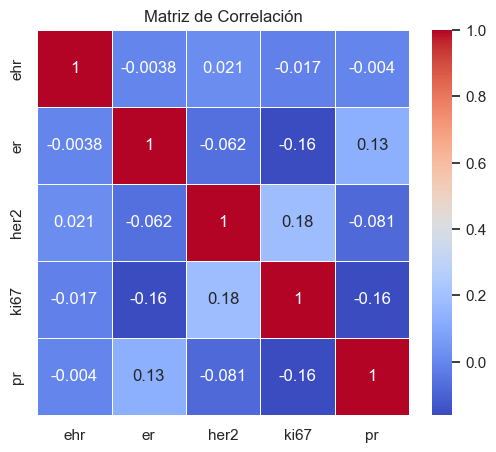

In [1774]:
# Calcular la matriz de correlación
matriz_correlacion = df_json.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

Observamos que no hay ningún tipo de correlación entre las variables dadas. De hecho, la mayoría tienen una mínima correlación negativa. 

Como no existe ningún tipo de correlación entre las variables, hemos decidido imputar los nulos por el valor más común de dicha columna.
Para ello calculamos por cada columna su moda, y elegimos el primer valor (es decir, el más común) y lo reemplazamos por los nulos de dicha columna

In [1775]:
# Imputación de er y pr con el valor más común
df_json['er'].fillna(df_json['er'].mode()[0], inplace=True)
df_json['pr'].fillna(df_json['pr'].mode()[0], inplace=True)

# Imputación de her2 y ki67 con el valor más común
df_json['her2'].fillna(df_json['her2'].mode()[0], inplace=True)

En cuanto a la columna 'ki67' como no es una columna binaria, sino que son porcentajes. Buscaremos una estrategia que cuadre mejor

Antes de anda, haremos un histograma para ver que rango de valores toma esta variable

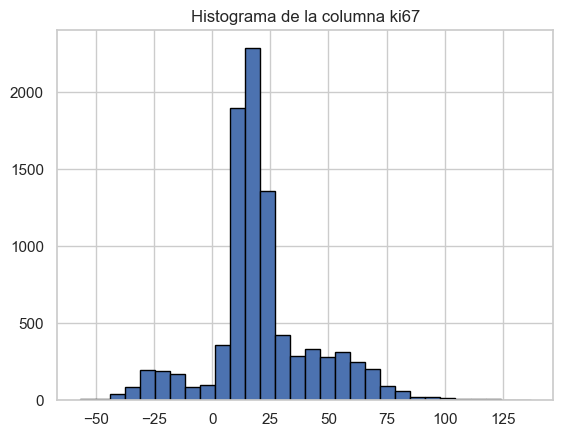

In [1776]:
plt.hist(df_json['ki67'], bins=30, edgecolor='black')
plt.title('Histograma de la columna ki67')
plt.show()

Como podemos observar, tenemos varios valores menores que 0, es decir, que tienen porcentaje negativo. Un valor negativo para el índice de proliferación del tumor (ki67) es erróneo y podría ser un error en los datos o en la recopilación de los mismos. 
Asimismo, también tenemos valores mayores que 100.

De tal manera, que imputaremos estos valores negativos como 0 y los valores mayores que 100 como 100. Y volvemos a mostrar el histograma

In [1777]:
df_json['ki67'] = df_json['ki67'].apply(lambda x: 0 if x < 0 else x)
df_json['ki67'] = df_json['ki67'].apply(lambda x: 100 if x > 100 else x)

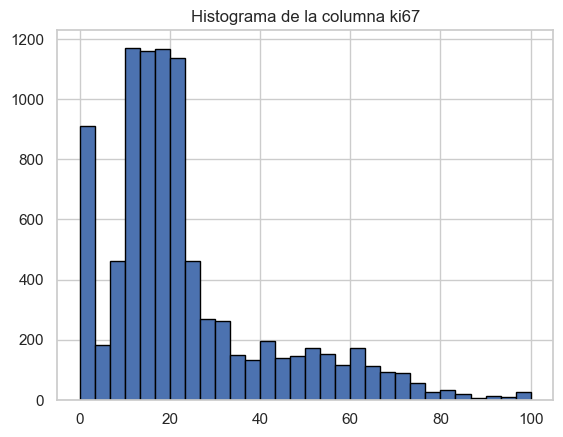

In [1778]:
plt.hist(df_json['ki67'], bins=30, edgecolor='black')
plt.title('Histograma de la columna ki67')
plt.show()

Ahora que tenemos todos los datos del índice de proliferación del tumor en un rango correcto (0,100), damos paso a la decisión de la estrategia de imputación de los nulos. 

Para ellos realizamos un boxplot para ver si tenemos muchos datos atípicos

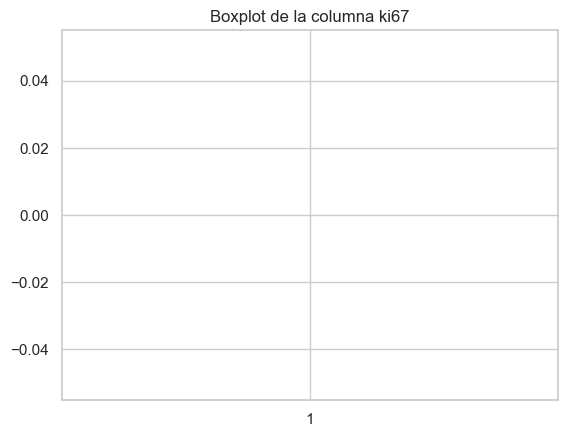

In [1779]:
plt.boxplot(df_json['ki67'])
plt.title('Boxplot de la columna ki67')
plt.show()

Como podemos observar tanto en el histograma como en el boxplot, tenemos bastantes datos atípicos, por lo tanto, imputar los nulos según la media sería desacertado ya que es bastante sensible a los datos atípicos. 

Por lo tanto, decidimos imputarlo según la mediana

In [1780]:
mediana = df_json['ki67'].median()
mediana

18.0

In [1781]:
df_json['ki67'].fillna(mediana, inplace=True)

In [1782]:
df_json

,ehr,er,her2,ki67,pr
0,10011773,0.0,0.0,19.0,1.0
1,10020495,1.0,0.0,9.0,0.0
2,10030299,1.0,0.0,18.0,1.0
3,10030824,1.0,0.0,18.0,1.0
4,10041592,0.0,0.0,65.0,0.0
...,...,...,...,...,...
9995,99966287,1.0,0.0,18.0,0.0
9996,99981192,1.0,0.0,14.0,0.0
9997,99988958,1.0,0.0,67.0,1.0
9998,99992350,0.0,0.0,16.0,0.0


In [1783]:
nulos = df_json.isnull()

num_nulos_por_columna = nulos.sum()

print("Número de valores nulos por columna:")
print(num_nulos_por_columna)

Número de valores nulos por columna:
ehr     0
er      0
her2    0
ki67    0
pr      0
dtype: int64


De esta manera, hemos imputado todos los nulos. Y tenemos los datos listos para el análisis de los mismos

## **Preprocesado datos_sql.csv**

In [1784]:
# df_sql.to_csv('datos_sql.csv')
df_sql = pd.read_csv('./Datos/datos_sql.csv')
df_sql = df_sql.drop('Unnamed: 0',axis=1)
df_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11167 entries, 0 to 11166
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ehr                      11167 non-null  int64  
 1   n_tumor                  11167 non-null  int64  
 2   t_category               11167 non-null  object 
 3   n_category               11167 non-null  int64  
 4   m_category               11167 non-null  int64  
 5   t_category_after_neoadj  5677 non-null   object 
 6   n_category_after_neoadj  5677 non-null   float64
 7   m_category_after_neoadj  5627 non-null   float64
 8   stage_diagnosis          11167 non-null  object 
 9   stage_after_neo          6064 non-null   object 
 10  grade                    11167 non-null  int64  
 11  ductal                   6324 non-null   float64
 12  lobular                  1564 non-null   float64
 13  neoadjuvant              11167 non-null  object 
dtypes: float64(4), int64(5

In [1785]:
df_sql.isnull().sum()

ehr                           0
n_tumor                       0
t_category                    0
n_category                    0
m_category                    0
t_category_after_neoadj    5490
n_category_after_neoadj    5490
m_category_after_neoadj    5540
stage_diagnosis               0
stage_after_neo            5103
grade                         0
ductal                     4843
lobular                    9603
neoadjuvant                   0
dtype: int64

Para las variables binarias 'ducatl' y 'lobular' observamos que solo hay valores 1 y el resto son nulos, por lo que deducimos que al guardarse dichas variables, en vez de guardar a 0 los valores donde no está presente dicho indicador, las han dejado como nulos, por lo que los transformamos a 0:

In [1786]:
df_sql['ductal'].value_counts()

1.0    6324
Name: ductal, dtype: int64

In [1787]:
df_sql['ductal'] = df_sql['ductal'].fillna(0)

In [1788]:
df_sql['lobular'].value_counts()

1.0    1564
Name: lobular, dtype: int64

In [1789]:
df_sql['lobular'] = df_sql['lobular'].fillna(0)

In [1790]:
df_sql.isnull().sum()

ehr                           0
n_tumor                       0
t_category                    0
n_category                    0
m_category                    0
t_category_after_neoadj    5490
n_category_after_neoadj    5490
m_category_after_neoadj    5540
stage_diagnosis               0
stage_after_neo            5103
grade                         0
ductal                        0
lobular                       0
neoadjuvant                   0
dtype: int64

Realizamos las pertinentes conversiones de tipos:

In [1791]:
df_sql['n_category'] = df_sql['n_category'].astype('int64')
df_sql['m_category'] = df_sql['m_category'].astype('int64')
df_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11167 entries, 0 to 11166
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ehr                      11167 non-null  int64  
 1   n_tumor                  11167 non-null  int64  
 2   t_category               11167 non-null  object 
 3   n_category               11167 non-null  int64  
 4   m_category               11167 non-null  int64  
 5   t_category_after_neoadj  5677 non-null   object 
 6   n_category_after_neoadj  5677 non-null   float64
 7   m_category_after_neoadj  5627 non-null   float64
 8   stage_diagnosis          11167 non-null  object 
 9   stage_after_neo          6064 non-null   object 
 10  grade                    11167 non-null  int64  
 11  ductal                   11167 non-null  float64
 12  lobular                  11167 non-null  float64
 13  neoadjuvant              11167 non-null  object 
dtypes: float64(4), int64(5

Para la variable binaria 'neoadjuvant', vamos a transformar sus valores a 0 y 1 para facilitar su manejo:

In [1792]:
dic = {'yes':1,'no':0}
df_sql['neoadjuvant'] = df_sql['neoadjuvant'].map(dic)
df_sql['neoadjuvant'] = df_sql['neoadjuvant'].astype('int64')
df_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11167 entries, 0 to 11166
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ehr                      11167 non-null  int64  
 1   n_tumor                  11167 non-null  int64  
 2   t_category               11167 non-null  object 
 3   n_category               11167 non-null  int64  
 4   m_category               11167 non-null  int64  
 5   t_category_after_neoadj  5677 non-null   object 
 6   n_category_after_neoadj  5677 non-null   float64
 7   m_category_after_neoadj  5627 non-null   float64
 8   stage_diagnosis          11167 non-null  object 
 9   stage_after_neo          6064 non-null   object 
 10  grade                    11167 non-null  int64  
 11  ductal                   11167 non-null  float64
 12  lobular                  11167 non-null  float64
 13  neoadjuvant              11167 non-null  int64  
dtypes: float64(4), int64(6

Para todas las variables 'after_neo', comprobamos si el número de nulos se corresponde con el número de valores 0 en la variable neoadjuvant, que indica que no han recibido este tratamiento, así podremos inputar de forma correcta estos nulos que observamos en dichas variables:

In [1793]:
df_sql['neoadjuvant'].value_counts()

1    5677
0    5490
Name: neoadjuvant, dtype: int64

Observamos que ambos valores coinciden en todas menos en 'stage_after_neo', es decir, hay 5677 valores no nulos en dichas variables y 5677 valores a 1 en 'neoadjuvant', por lo que podemos imputar los nulos como 'SIN TRATAMIENTO':

In [1794]:
df_sql.loc[df_sql['neoadjuvant'] == 0, 'm_category_after_neoadj'] = 'SIN TRATAMIENTO'
df_sql.loc[df_sql['neoadjuvant'] == 0, 't_category_after_neoadj'] = 'SIN TRATAMIENTO'
df_sql.loc[df_sql['neoadjuvant'] == 0, 'n_category_after_neoadj'] = 'SIN TRATAMIENTO'
df_sql.isnull().sum()

ehr                           0
n_tumor                       0
t_category                    0
n_category                    0
m_category                    0
t_category_after_neoadj       0
n_category_after_neoadj       0
m_category_after_neoadj      50
stage_diagnosis               0
stage_after_neo            5103
grade                         0
ductal                        0
lobular                       0
neoadjuvant                   0
dtype: int64

Comenzamos por asignar a nulos a todos los pacientes que no se hayan administrado la medicación:

In [1795]:
df_sql.loc[df_sql['neoadjuvant'] == 0, 'stage_after_neo'] = 'SIN TRATAMIENTO' 
df_sql.isnull().sum()

ehr                          0
n_tumor                      0
t_category                   0
n_category                   0
m_category                   0
t_category_after_neoadj      0
n_category_after_neoadj      0
m_category_after_neoadj     50
stage_diagnosis              0
stage_after_neo            119
grade                        0
ductal                       0
lobular                      0
neoadjuvant                  0
dtype: int64

Ya hemos detectado aquellos valores que son nulos en 'stage_after_neo' y sí han recibido el tratamiento neoadjuvant. Esto puede deberse a un simple error o a que aún no se le ha hecho el diagnóstico después del tratamiento. Al tratarse de pocos valores en comparación con los que tenemos, los imputaremos como si no se hubiesen administrado el tratamiento aún:

In [1796]:
df_sql['stage_after_neo'] = df_sql['stage_after_neo'].fillna('SIN TRATAMIENTO')
df_sql.isnull().sum()

ehr                         0
n_tumor                     0
t_category                  0
n_category                  0
m_category                  0
t_category_after_neoadj     0
n_category_after_neoadj     0
m_category_after_neoadj    50
stage_diagnosis             0
stage_after_neo             0
grade                       0
ductal                      0
lobular                     0
neoadjuvant                 0
dtype: int64

Para la variable 'm_category_after_neoadj', al tratarse de tan solo 50 nulos, los imputamos con la moda:

In [1797]:
df_sql['m_category_after_neoadj'].value_counts()

SIN TRATAMIENTO    5490
0.0                4930
1.0                 697
Name: m_category_after_neoadj, dtype: int64

In [1798]:
df_sql['m_category_after_neoadj'] = df_sql['m_category_after_neoadj'].fillna(0)
df_sql.isnull().sum()

ehr                        0
n_tumor                    0
t_category                 0
n_category                 0
m_category                 0
t_category_after_neoadj    0
n_category_after_neoadj    0
m_category_after_neoadj    0
stage_diagnosis            0
stage_after_neo            0
grade                      0
ductal                     0
lobular                    0
neoadjuvant                0
dtype: int64

In [1799]:
def recuento_valores(df):
    columnas = list(df.columns)
    valores = {}
    for i in range(0,len(columnas)):
        valores[columnas[i]] = df[columnas[i]].value_counts()
    return valores

In [1800]:
valores = recuento_valores(df_sql)

In [1801]:
def histograma(dic, variable):
    datos = dic[variable].values
    indice = list(dic[variable].index)

# Obtener colores automáticamente utilizando un mapa de colores de Matplotlib
    colores = plt.cm.tab10(range(len(set(indice))))
    plt.figure(figsize=(8,4))

    # Crear un histograma con colores diferentes para cada valor en el índice
    for i, val in enumerate(indice):
        plt.bar(str(val), datos[i], color=colores[i], edgecolor='black')

    # Ajustar los ticks del eje x automáticamente, utilizando etiquetas categóricas
    plt.xticks(list(map(str, indice)))

    # Personalizar el gráfico
    plt.title(f'Histograma de {variable}')
    plt.xlabel('Categorías')
    plt.ylabel('Frecuencia')

    # Mostrar el histograma
    plt.show()

Vamos a analizar el histograma de cada variable para conocer sus distribuciones:

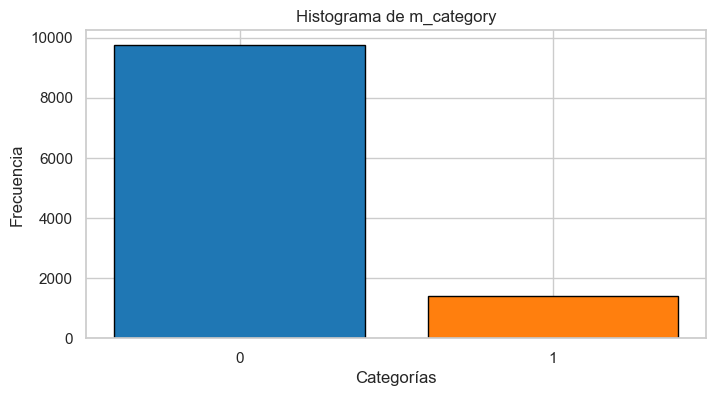

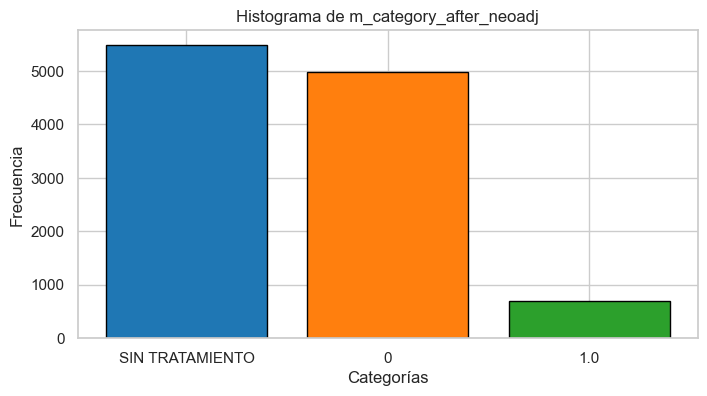

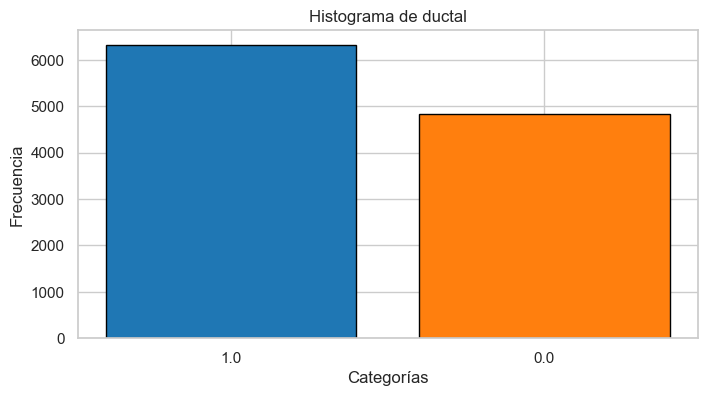

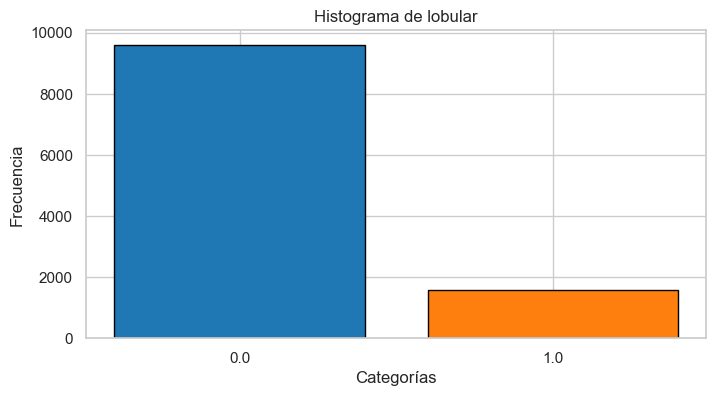

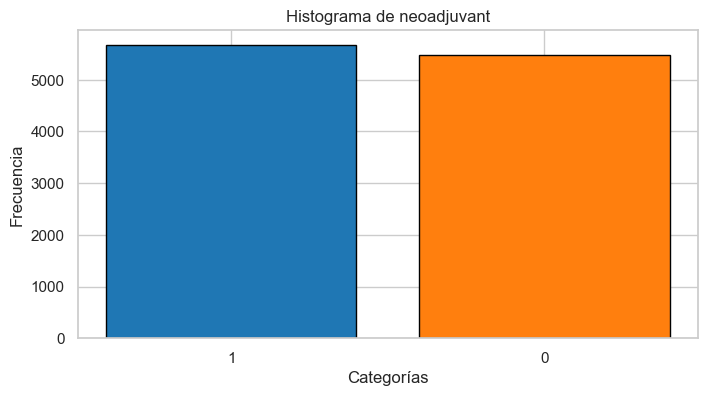

In [1802]:
variables_binarias = ['m_category','m_category_after_neoadj','ductal','lobular','neoadjuvant']
for i in range(len(variables_binarias)):
    histograma(valores,variables_binarias[i])

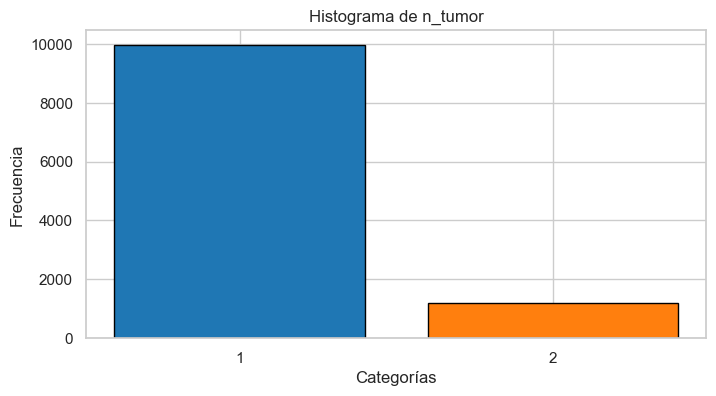

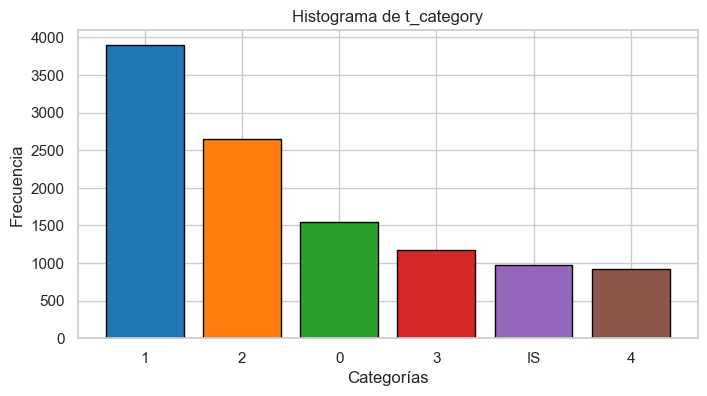

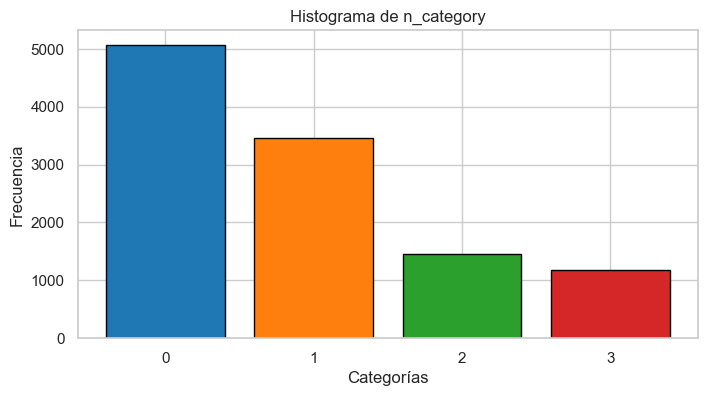

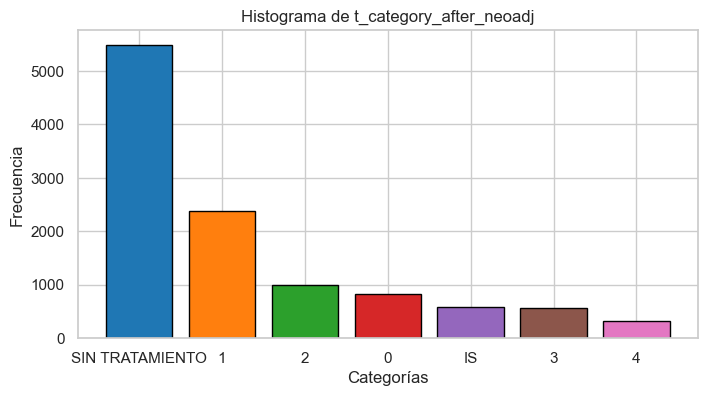

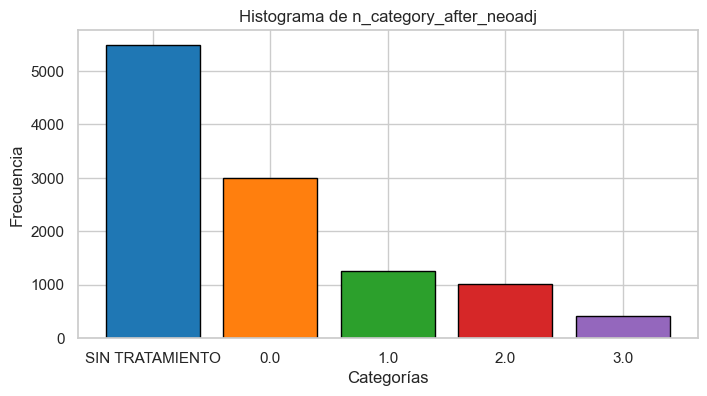

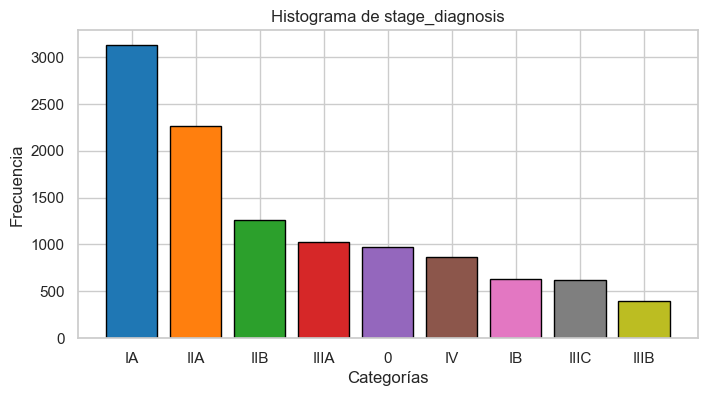

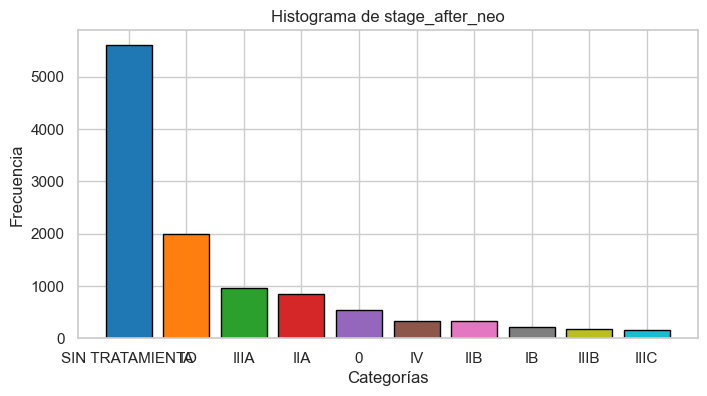

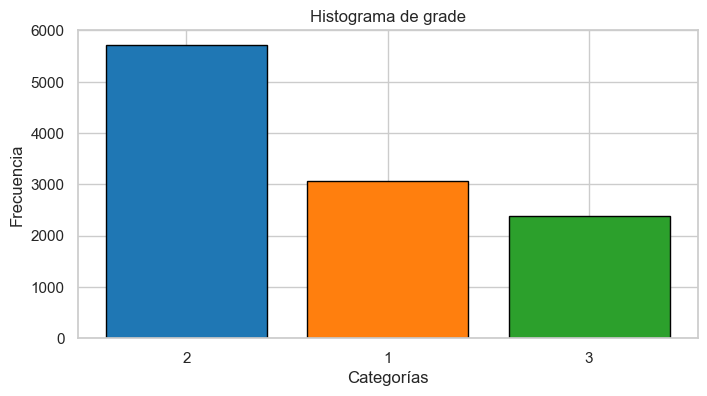

In [1803]:
variables_no_binarias = ['n_tumor','t_category','n_category','t_category_after_neoadj','n_category_after_neoadj','stage_diagnosis','stage_after_neo','grade']
for i in range(len(variables_no_binarias)):
    histograma(valores,variables_no_binarias[i])

## **UNIÓN DE LOS DATOS**

Tenemos los datos de 3 fuentes distintas ya preprocesados: los datos de excel,csv,json y sql, guardados en las variables df,df_csv,df_json y df_sql respectivamente. Primero vamos a observar los tamaños de cada uno:

In [1804]:
print(f'Tamaño df: {len(df)}\nTamaño df_csv: {len(df_csv)}\nTamaño df_json:{len(df_json)}\nTamaño df_sql: {len(df_sql)}')

Tamaño df: 6173
Tamaño df_csv: 10000
Tamaño df_json:10000
Tamaño df_sql: 11167


Podemos observar que tienen tamaños distintos, por lo que un simple merge por la columna ehr no es posible. Examinamos primeramente la posibilidad de unir los df_csv y df_json, ya que tienen el mismo tamaño:

In [1805]:
df.dtypes

ehr              float64
pregnancy        float64
birth            float64
caesarean        float64
abort            float64
menarche_age     float64
menopause_age    float64
inconsistency      int64
dtype: object

In [1806]:
df['ehr'] = df['ehr'].astype('int64')
df.dtypes


/var/folders/vq/_5shyx4s4fqbgck29gkr7mc80000gn/T/ipykernel_64139/3769711858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ehr'] = df['ehr'].astype('int64')


ehr                int64
pregnancy        float64
birth            float64
caesarean        float64
abort            float64
menarche_age     float64
menopause_age    float64
inconsistency      int64
dtype: object

In [1807]:
df

,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age,inconsistency
0,10011773,0.0,0.0,0.0,0.0,13.0,49.0,0
1,10030299,3.0,3.0,0.0,0.0,13.0,49.0,0
2,10030824,0.0,0.0,0.0,0.0,13.0,44.0,0
3,10053435,2.0,1.0,0.0,1.0,13.0,49.0,0
4,10111454,0.0,0.0,0.0,0.0,16.0,55.0,0
...,...,...,...,...,...,...,...,...
7679,99915606,0.0,0.0,0.0,0.0,12.0,56.0,0
7682,99961100,2.0,2.0,0.0,0.0,19.0,52.0,0
7683,99981192,3.0,3.0,0.0,0.0,11.0,49.0,0
7684,99992350,4.0,3.0,1.0,0.0,11.0,55.0,0


In [1808]:
df_merge = pd.merge(df_csv,df_json,on='ehr',how='inner')
df_merge

,ehr,birth_date,diagnosis_date,death_date,Age,er,her2,ki67,pr
0,10011773,1959-05-07,2015-02-04,NaT,65,0.0,0.0,19.0,1.0
1,10020495,1953-02-10,2017-04-12,NaT,71,1.0,0.0,9.0,0.0
2,10030299,1966-08-16,2019-06-27,NaT,58,1.0,0.0,18.0,1.0
3,10030824,1953-03-03,2018-07-09,NaT,71,1.0,0.0,18.0,1.0
4,10041592,1959-06-07,2018-11-19,NaT,65,0.0,0.0,65.0,0.0
...,...,...,...,...,...,...,...,...,...
9995,99966287,1978-12-16,2018-02-08,NaT,46,1.0,0.0,18.0,0.0
9996,99981192,1949-10-04,2017-10-28,NaT,75,1.0,0.0,14.0,0.0
9997,99988958,1966-01-21,2013-05-27,NaT,58,1.0,0.0,67.0,1.0
9998,99992350,1939-04-09,2018-12-17,NaT,85,0.0,0.0,16.0,0.0


In [1809]:
df_merge_2 = pd.merge(df_merge,df,on='ehr',how='outer')
df_merge_2

,ehr,birth_date,diagnosis_date,death_date,Age,er,her2,ki67,pr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age,inconsistency
0,10011773,1959-05-07,2015-02-04,NaT,65,0.0,0.0,19.0,1.0,0.0,0.0,0.0,0.0,13.0,49.0,0.0
1,10020495,1953-02-10,2017-04-12,NaT,71,1.0,0.0,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10030299,1966-08-16,2019-06-27,NaT,58,1.0,0.0,18.0,1.0,3.0,3.0,0.0,0.0,13.0,49.0,0.0
3,10030824,1953-03-03,2018-07-09,NaT,71,1.0,0.0,18.0,1.0,0.0,0.0,0.0,0.0,13.0,44.0,0.0
4,10041592,1959-06-07,2018-11-19,NaT,65,0.0,0.0,65.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,99966287,1978-12-16,2018-02-08,NaT,46,1.0,0.0,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,99981192,1949-10-04,2017-10-28,NaT,75,1.0,0.0,14.0,0.0,3.0,3.0,0.0,0.0,11.0,49.0,0.0
9997,99988958,1966-01-21,2013-05-27,NaT,58,1.0,0.0,67.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,99992350,1939-04-09,2018-12-17,NaT,85,0.0,0.0,16.0,0.0,4.0,3.0,1.0,0.0,11.0,55.0,0.0


Hemos unido ambos datasets , con todas las posibilidades, ahora bien, hay pacientes de los cuáles no se tienen datos , y por lo tanto se ponen como NaN, por ello es que se realiza una nueva imputación, de tal manera, que las columnas de asociadas a embarazos se toman a 0 y las de menarche_age y menopause_ se toman como la primera de las imputaciones, con la media en uno de los casos y la mediana en el otro.

In [1810]:
df_merge_2.isnull().sum()

ehr                  0
birth_date           0
diagnosis_date       0
death_date        8865
Age                  0
er                   0
her2                 0
ki67                 0
pr                   0
pregnancy         3827
birth             3827
caesarean         3827
abort             3827
menarche_age      3827
menopause_age     3827
inconsistency     3827
dtype: int64

In [1811]:
columnas_a_imputar = ['pregnancy', 'abort', 'birth', 'caesarean']
df_merge_2[columnas_a_imputar] = df_merge_2[columnas_a_imputar].fillna(0)
df_merge_2


,ehr,birth_date,diagnosis_date,death_date,Age,er,her2,ki67,pr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age,inconsistency
0,10011773,1959-05-07,2015-02-04,NaT,65,0.0,0.0,19.0,1.0,0.0,0.0,0.0,0.0,13.0,49.0,0.0
1,10020495,1953-02-10,2017-04-12,NaT,71,1.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,10030299,1966-08-16,2019-06-27,NaT,58,1.0,0.0,18.0,1.0,3.0,3.0,0.0,0.0,13.0,49.0,0.0
3,10030824,1953-03-03,2018-07-09,NaT,71,1.0,0.0,18.0,1.0,0.0,0.0,0.0,0.0,13.0,44.0,0.0
4,10041592,1959-06-07,2018-11-19,NaT,65,0.0,0.0,65.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,99966287,1978-12-16,2018-02-08,NaT,46,1.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
9996,99981192,1949-10-04,2017-10-28,NaT,75,1.0,0.0,14.0,0.0,3.0,3.0,0.0,0.0,11.0,49.0,0.0
9997,99988958,1966-01-21,2013-05-27,NaT,58,1.0,0.0,67.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
9998,99992350,1939-04-09,2018-12-17,NaT,85,0.0,0.0,16.0,0.0,4.0,3.0,1.0,0.0,11.0,55.0,0.0


In [1812]:
# Imputa los valores NaN en menarche_age con la media
media_menarche = df_merge_2['menarche_age'].mean()
df_merge_2['menarche_age'].fillna(media_menarche, inplace=True)

# Imputa los valores NaN en menopause_age con la mediana
mediana_menopause = df_merge_2['menopause_age'].median()
df_merge_2['menopause_age'].fillna(mediana_menopause, inplace=True)

df_merge_2 = df_merge_2.drop('inconsistency', axis=1)

In [1813]:
df_merge_2.dtypes

ehr                        int64
birth_date        datetime64[ns]
diagnosis_date    datetime64[ns]
death_date        datetime64[ns]
Age                        int64
er                       float64
her2                     float64
ki67                     float64
pr                       float64
pregnancy                float64
birth                    float64
caesarean                float64
abort                    float64
menarche_age             float64
menopause_age            float64
dtype: object

In [1814]:
df_merge_2.isnull().sum()

ehr                  0
birth_date           0
diagnosis_date       0
death_date        8865
Age                  0
er                   0
her2                 0
ki67                 0
pr                   0
pregnancy            0
birth                0
caesarean            0
abort                0
menarche_age         0
menopause_age        0
dtype: int64

In [1815]:
duplicados_merge = df_merge_2[df_merge_2.duplicated(subset='ehr', keep=False)]
duplicados_merge #No existen duplicados

,ehr,birth_date,diagnosis_date,death_date,Age,er,her2,ki67,pr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age


In [1816]:
duplicados_sql = df_sql[df_sql.duplicated(subset='ehr', keep=False)]
duplicados_sql

,ehr,n_tumor,t_category,n_category,m_category,t_category_after_neoadj,n_category_after_neoadj,m_category_after_neoadj,stage_diagnosis,stage_after_neo,grade,ductal,lobular,neoadjuvant
1,10020495,1,1,0,0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IA,SIN TRATAMIENTO,2,1.0,0.0,0
2,10020495,2,3,1,0,2,0.0,0,IA,SIN TRATAMIENTO,2,1.0,0.0,1
18,10144916,1,1,0,0,1,0.0,1.0,IA,IA,2,0.0,1.0,1
19,10144916,2,1,1,0,1,0.0,1.0,IA,IA,2,0.0,1.0,1
20,10145135,1,1,0,0,1,0.0,0.0,IB,IA,2,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11125,99656792,2,2,0,0,4,0.0,0,IA,SIN TRATAMIENTO,1,0.0,0.0,1
11127,99690760,1,1,0,0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IA,SIN TRATAMIENTO,1,1.0,0.0,0
11128,99690760,2,3,0,0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IA,SIN TRATAMIENTO,1,1.0,0.0,0
11144,99807703,1,2,1,0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IIIA,SIN TRATAMIENTO,2,0.0,1.0,0


In [1817]:
n1_df = df_sql.copy()
n1_df = n1_df[n1_df['n_tumor']!=2]
n1_df

,ehr,n_tumor,t_category,n_category,m_category,t_category_after_neoadj,n_category_after_neoadj,m_category_after_neoadj,stage_diagnosis,stage_after_neo,grade,ductal,lobular,neoadjuvant
0,10011773,1,IS,0,0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,0,SIN TRATAMIENTO,1,0.0,0.0,0
1,10020495,1,1,0,0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IA,SIN TRATAMIENTO,2,1.0,0.0,0
3,10030299,1,1,0,0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IA,SIN TRATAMIENTO,1,1.0,0.0,0
4,10030824,1,2,1,0,2,2.0,0.0,IIIA,IIIA,3,0.0,1.0,1
5,10041592,1,1,1,0,4,0.0,0.0,IB,IA,2,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11162,99966287,1,1,1,0,1,0.0,0.0,IB,IIA,3,1.0,0.0,1
11163,99981192,1,1,0,0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IA,SIN TRATAMIENTO,2,0.0,0.0,0
11164,99988958,1,0,2,0,1,1.0,0.0,IIIA,IIA,1,1.0,0.0,1
11165,99992350,1,2,0,0,3,2.0,0.0,IIA,IIIA,2,1.0,0.0,1


In [1818]:
df_merge_3 = pd.merge(df_merge_2,n1_df,on='ehr',how='outer',validate='one_to_one')
df_merge_3

,ehr,birth_date,diagnosis_date,death_date,Age,er,her2,ki67,pr,pregnancy,...,m_category,t_category_after_neoadj,n_category_after_neoadj,m_category_after_neoadj,stage_diagnosis,stage_after_neo,grade,ductal,lobular,neoadjuvant
0,10011773,1959-05-07,2015-02-04,NaT,65,0.0,0.0,19.0,1.0,0.0,...,0.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,0,SIN TRATAMIENTO,1.0,0.0,0.0,0.0
1,10020495,1953-02-10,2017-04-12,NaT,71,1.0,0.0,9.0,0.0,0.0,...,0.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IA,SIN TRATAMIENTO,2.0,1.0,0.0,0.0
2,10030299,1966-08-16,2019-06-27,NaT,58,1.0,0.0,18.0,1.0,3.0,...,0.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IA,SIN TRATAMIENTO,1.0,1.0,0.0,0.0
3,10030824,1953-03-03,2018-07-09,NaT,71,1.0,0.0,18.0,1.0,0.0,...,0.0,2,2.0,0.0,IIIA,IIIA,3.0,0.0,1.0,1.0
4,10041592,1959-06-07,2018-11-19,NaT,65,0.0,0.0,65.0,0.0,0.0,...,0.0,4,0.0,0.0,IB,IA,2.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,99966287,1978-12-16,2018-02-08,NaT,46,1.0,0.0,18.0,0.0,0.0,...,0.0,1,0.0,0.0,IB,IIA,3.0,1.0,0.0,1.0
9996,99981192,1949-10-04,2017-10-28,NaT,75,1.0,0.0,14.0,0.0,3.0,...,0.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IA,SIN TRATAMIENTO,2.0,0.0,0.0,0.0
9997,99988958,1966-01-21,2013-05-27,NaT,58,1.0,0.0,67.0,1.0,0.0,...,0.0,1,1.0,0.0,IIIA,IIA,1.0,1.0,0.0,1.0
9998,99992350,1939-04-09,2018-12-17,NaT,85,0.0,0.0,16.0,0.0,4.0,...,0.0,3,2.0,0.0,IIA,IIIA,2.0,1.0,0.0,1.0


In [1819]:
n2_df = df_sql[df_sql['n_tumor']==2]
n2_df

,ehr,n_tumor,t_category,n_category,m_category,t_category_after_neoadj,n_category_after_neoadj,m_category_after_neoadj,stage_diagnosis,stage_after_neo,grade,ductal,lobular,neoadjuvant
2,10020495,2,3,1,0,2,0.0,0,IA,SIN TRATAMIENTO,2,1.0,0.0,1
19,10144916,2,1,1,0,1,0.0,1.0,IA,IA,2,0.0,1.0,1
21,10145135,2,1,1,0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IB,SIN TRATAMIENTO,2,0.0,1.0,0
45,10353432,2,2,2,0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IV,SIN TRATAMIENTO,2,1.0,0.0,0
48,10359877,2,3,2,1,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IIIA,SIN TRATAMIENTO,2,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11092,99343880,2,3,1,1,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IA,SIN TRATAMIENTO,2,0.0,0.0,0
11106,99443402,2,2,1,1,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IIB,SIN TRATAMIENTO,3,0.0,1.0,0
11125,99656792,2,2,0,0,4,0.0,0,IA,SIN TRATAMIENTO,1,0.0,0.0,1
11128,99690760,2,3,0,0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IA,SIN TRATAMIENTO,1,1.0,0.0,0


In [1820]:
df_merge_4 = pd.merge(df_merge_2,n2_df,on='ehr',how='outer',validate='one_to_one')
datos_merge_n2 = df_merge_4[df_merge_4['n_tumor']==2]
datos_merge_n2

,ehr,birth_date,diagnosis_date,death_date,Age,er,her2,ki67,pr,pregnancy,...,m_category,t_category_after_neoadj,n_category_after_neoadj,m_category_after_neoadj,stage_diagnosis,stage_after_neo,grade,ductal,lobular,neoadjuvant
1,10020495,1953-02-10,2017-04-12,NaT,71,1.0,0.0,9.0,0.0,0.0,...,0.0,2,0.0,0,IA,SIN TRATAMIENTO,2.0,1.0,0.0,1.0
17,10144916,1972-10-21,2018-09-23,NaT,52,1.0,0.0,20.0,1.0,0.0,...,0.0,1,0.0,1.0,IA,IA,2.0,0.0,1.0,1.0
18,10145135,1961-07-24,2012-09-28,2016-09-28,63,1.0,0.0,16.0,1.0,3.0,...,0.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IB,SIN TRATAMIENTO,2.0,0.0,1.0,0.0
41,10353432,1953-01-13,2017-06-15,NaT,71,1.0,0.0,0.0,1.0,0.0,...,0.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IV,SIN TRATAMIENTO,2.0,1.0,0.0,0.0
43,10359877,1965-06-30,2016-03-25,2014-09-05,59,0.0,0.0,0.0,1.0,0.0,...,1.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IIIA,SIN TRATAMIENTO,2.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9929,99343880,1944-08-23,2018-05-28,NaT,80,1.0,0.0,68.0,1.0,2.0,...,1.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IA,SIN TRATAMIENTO,2.0,0.0,0.0,0.0
9942,99443402,1959-06-17,2018-01-21,NaT,65,1.0,0.0,22.0,0.0,0.0,...,1.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IIB,SIN TRATAMIENTO,3.0,0.0,1.0,0.0
9960,99656792,1976-03-26,2017-07-23,NaT,48,1.0,1.0,49.0,0.0,0.0,...,0.0,4,0.0,0,IA,SIN TRATAMIENTO,1.0,0.0,0.0,1.0
9962,99690760,1961-07-21,2013-10-28,NaT,63,1.0,0.0,20.0,1.0,1.0,...,0.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IA,SIN TRATAMIENTO,1.0,1.0,0.0,0.0


In [1821]:
df_final = pd.concat([df_merge_3,datos_merge_n2])
df_final

,ehr,birth_date,diagnosis_date,death_date,Age,er,her2,ki67,pr,pregnancy,...,m_category,t_category_after_neoadj,n_category_after_neoadj,m_category_after_neoadj,stage_diagnosis,stage_after_neo,grade,ductal,lobular,neoadjuvant
0,10011773,1959-05-07,2015-02-04,NaT,65,0.0,0.0,19.0,1.0,0.0,...,0.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,0,SIN TRATAMIENTO,1.0,0.0,0.0,0.0
1,10020495,1953-02-10,2017-04-12,NaT,71,1.0,0.0,9.0,0.0,0.0,...,0.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IA,SIN TRATAMIENTO,2.0,1.0,0.0,0.0
2,10030299,1966-08-16,2019-06-27,NaT,58,1.0,0.0,18.0,1.0,3.0,...,0.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IA,SIN TRATAMIENTO,1.0,1.0,0.0,0.0
3,10030824,1953-03-03,2018-07-09,NaT,71,1.0,0.0,18.0,1.0,0.0,...,0.0,2,2.0,0.0,IIIA,IIIA,3.0,0.0,1.0,1.0
4,10041592,1959-06-07,2018-11-19,NaT,65,0.0,0.0,65.0,0.0,0.0,...,0.0,4,0.0,0.0,IB,IA,2.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9929,99343880,1944-08-23,2018-05-28,NaT,80,1.0,0.0,68.0,1.0,2.0,...,1.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IA,SIN TRATAMIENTO,2.0,0.0,0.0,0.0
9942,99443402,1959-06-17,2018-01-21,NaT,65,1.0,0.0,22.0,0.0,0.0,...,1.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IIB,SIN TRATAMIENTO,3.0,0.0,1.0,0.0
9960,99656792,1976-03-26,2017-07-23,NaT,48,1.0,1.0,49.0,0.0,0.0,...,0.0,4,0.0,0,IA,SIN TRATAMIENTO,1.0,0.0,0.0,1.0
9962,99690760,1961-07-21,2013-10-28,NaT,63,1.0,0.0,20.0,1.0,1.0,...,0.0,SIN TRATAMIENTO,SIN TRATAMIENTO,SIN TRATAMIENTO,IA,SIN TRATAMIENTO,1.0,1.0,0.0,0.0


In [1822]:
df_final.isnull().sum()

ehr                           0
birth_date                    0
diagnosis_date                0
death_date                 9917
Age                           0
er                            0
her2                          0
ki67                          0
pr                            0
pregnancy                     0
birth                         0
caesarean                     0
abort                         0
menarche_age                  0
menopause_age                 0
n_tumor                      29
t_category                   29
n_category                   29
m_category                   29
t_category_after_neoadj      29
n_category_after_neoadj      29
m_category_after_neoadj      29
stage_diagnosis              29
stage_after_neo              29
grade                        29
ductal                       29
lobular                      29
neoadjuvant                  29
dtype: int64

Al tratarse de únicamente 29 nulos tras hacer el merge, como contamos con más de 11 000 datos no supone ni un 0.3% de nuestros datos, por lo que los eliminamos:

In [1823]:
df_final = df_final.dropna(subset=['n_tumor'])
df_final.isnull().sum()

ehr                           0
birth_date                    0
diagnosis_date                0
death_date                 9892
Age                           0
er                            0
her2                          0
ki67                          0
pr                            0
pregnancy                     0
birth                         0
caesarean                     0
abort                         0
menarche_age                  0
menopause_age                 0
n_tumor                       0
t_category                    0
n_category                    0
m_category                    0
t_category_after_neoadj       0
n_category_after_neoadj       0
m_category_after_neoadj       0
stage_diagnosis               0
stage_after_neo               0
grade                         0
ductal                        0
lobular                       0
neoadjuvant                   0
dtype: int64

Exportamos ahora el df_final a csv para realizar el análisis del mismo

In [1824]:
df_final.to_csv('df_final.csv')